In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file 1/0 (e.g. pd.read_csv)
import os #le to use operating system dependent functionality
import librosa# a to extract speech features
import wave # read and write wy files
import matplotlib.pyplot as plt #to generate the visualizations
#MlP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
#LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def extract_mfcc (wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input path_to_wav_file
    #Output: mfcc_features***
    y, sr =librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc (y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs

In [4]:
##### load radvess speech data #####
radvess_speech_labels= [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname,_, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio'):
      for filename in filenames:
      #print (os.path.join(dirname, filename))
          radvess_speech_labels.append(int (filename [7:8])-1) # the index 7 and 8 of the file name represent the emotion label
          wav_file_name= os. path.join(dirname, filename)
          ravdess_speech_data.append(extract_mfcc (wav_file_name)) # extract MFCC features/file
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [5]:
ravdess_speech_data

[array([-5.5058545e+02,  6.3863407e+01, -4.4484200e+00,  1.3594886e+01,
         4.8513751e+00,  6.5071983e+00,  1.8665652e+00, -1.5731583e+01,
        -7.7440472e+00,  2.7967024e+00, -7.1663773e-01, -4.8513761e+00,
         5.0106664e+00, -1.1197029e-01, -2.9889777e+00,  1.4395221e+00,
        -1.0425620e+00,  9.2058760e-01, -2.9221466e+00,  1.0303540e+00,
        -2.6019897e+00, -5.7866514e-01, -2.3374727e+00,  1.5103301e+00,
        -9.7259182e-01,  3.1218138e+00, -2.9685242e+00, -1.5730046e-01,
        -3.6615851e+00, -2.4394324e+00, -2.6608529e+00,  1.3218423e+00,
         9.8712379e-01,  1.5336171e+00, -8.8472074e-01, -1.0693314e+00,
         1.9649916e+00, -4.8787933e-02, -4.6528864e-01,  1.0877807e+00],
       dtype=float32),
 array([-4.1797501e+02,  3.3882317e+01, -4.2771444e+00,  3.5818024e+00,
         1.6259868e-01,  1.3603489e+00, -2.0349870e+00, -5.9920883e+00,
        -6.4194536e+00, -1.2584414e+00, -1.7545136e+00, -4.1379385e+00,
        -1.4698563e+00, -4.3132124e+00, 

In [6]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions
#### make categorical labels.
labels_categorical=to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape

(2910, 8)

In [7]:
ravdess_speech_data_array

array([[-5.5058545e+02,  6.3863407e+01, -4.4484200e+00, ...,
        -4.8787933e-02, -4.6528864e-01,  1.0877807e+00],
       [-4.1797501e+02,  3.3882317e+01, -4.2771444e+00, ...,
         4.1007671e+00,  1.7486236e+00,  1.5739672e+00],
       [-6.4341547e+02,  7.4270744e+01,  1.0128962e+01, ...,
        -9.8343390e-01, -2.1397293e+00, -1.6564239e+00],
       ...,
       [-4.0170172e+02,  2.9973305e+01, -1.5743985e+01, ...,
         3.2739129e+00,  4.5597443e-01,  1.7335236e+00],
       [-5.5319366e+02,  4.1932564e+01, -5.2114596e+00, ...,
        -6.6592193e-01, -1.4736134e+00, -1.0706234e+00],
       [-6.2286993e+02,  6.1635403e+01,  7.4148278e+00, ...,
        -1.2185652e+00, -3.2990150e+00, -2.5086894e+00]], dtype=float32)

In [8]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),
                                                labels_categorical, test_size=0.20, random_state=9)

In [9]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape [0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int (number_of_samples * 0.1)
test_samples=int(number_of_samples * 0.1)

In [10]:
validation_samples

291

In [11]:
training_samples

2328

In [12]:
test_samples

291

In [13]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add (Activation ('relu'))
    model.add (Dense(32))
    model.add (Dropout(0.4))
    model.add (Activation ('relu'))
    model.add (Dense(8))
    model.add (Activation ('softmax'))
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [14]:
w= np.expand_dims (ravdess_speech_data_array[:training_samples], -1)


In [15]:
w.shape

(2328, 40, 1)

In [16]:
### train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples], -1),
                      labels_categorical[:training_samples],
                      validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples + validation_samples], -1),
                      labels_categorical[training_samples:training_samples + validation_samples]), epochs=150, shuffle=True)

Epoch 1/150
73/73 [==============================] - 5s 38ms/step - loss: 2.0694 - accuracy: 0.1503 - val_loss: 2.0276 - val_accuracy: 0.1890
Epoch 2/150
73/73 [==============================] - 3s 42ms/step - loss: 2.0175 - accuracy: 0.1980 - val_loss: 1.9078 - val_accuracy: 0.2440
Epoch 3/150
73/73 [==============================] - 2s 32ms/step - loss: 1.9443 - accuracy: 0.2341 - val_loss: 1.8748 - val_accuracy: 0.2715
Epoch 4/150
73/73 [==============================] - 3s 40ms/step - loss: 1.9083 - accuracy: 0.2655 - val_loss: 1.8616 - val_accuracy: 0.2577
Epoch 5/150
73/73 [==============================] - 2s 33ms/step - loss: 1.8550 - accuracy: 0.2805 - val_loss: 1.8401 - val_accuracy: 0.2749
Epoch 6/150
73/73 [==============================] - 2s 32ms/step - loss: 1.8596 - accuracy: 0.2779 - val_loss: 1.7813 - val_accuracy: 0.3196
Epoch 7/150
73/73 [==============================] - 2s 31ms/step - loss: 1.8474 - accuracy: 0.2938 - val_loss: 1.7917 - val_accuracy: 0.3402
Epoch 

['accuracy']


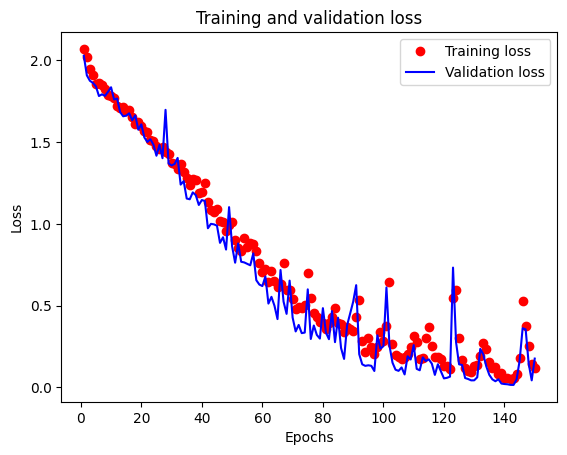

In [17]:
### loss plots using LSTM model
loss=history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len (loss) + 1)

plt.plot (epochs, loss, 'ro', label='Training loss')
plt.plot (epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

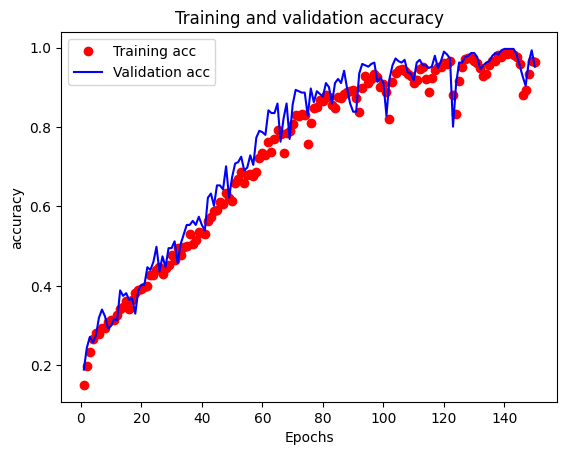

In [18]:
### accuracy plots using LSTM model
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot (epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel ('accuracy')
plt.legend ()

plt.show()

In [19]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1),
                  labels_categorical[training_samples + validation_samples:])

10/10 [==============================] - 0s 19ms/step - loss: 0.0676 - accuracy: 0.9794


[0.06760981678962708, 0.9793814420700073]

In [20]:
emotions={1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'surprised'}


def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [21]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav')

1/1 [==============================] - 1s 712ms/step
neutral


In [22]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav')

1/1 [==============================] - 0s 38ms/step
neutral


In [23]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_11/03-01-01-01-01-02-11.wav')

1/1 [==============================] - 0s 23ms/step
calm


In [24]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_14/03-01-01-01-02-01-14.wav')

1/1 [==============================] - 0s 29ms/step
neutral


In [25]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-02-02.wav')

1/1 [==============================] - 0s 25ms/step
happy


In [26]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_23/03-01-04-02-01-01-23.wav')

1/1 [==============================] - 0s 23ms/step
sad


In [27]:
predict('/content/drive/MyDrive/T5/CUSTOM_DATASET/Speaker1/01_01_01_01_01.wav')

1/1 [==============================] - 0s 58ms/step
sad


In [28]:
model_A.save('test1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.05.52 PM.wav')

1/1 [==============================] - 0s 26ms/step
sad


In [30]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.24.15 PM (1).wav')

1/1 [==============================] - 0s 28ms/step
disgust


In [31]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.24.15 PM.wav')

1/1 [==============================] - 0s 32ms/step
disgust


In [32]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.25.31 PM.wav')

1/1 [==============================] - 0s 24ms/step
disgust


In [33]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.32.00 PM.wav')

1/1 [==============================] - 0s 28ms/step
calm


In [34]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.25.31 PM (1).wav')

1/1 [==============================] - 0s 28ms/step
disgust


In [35]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.40.59 PM.wav')

1/1 [==============================] - 0s 35ms/step
sad


In [36]:
predict('/content/drive/MyDrive/T5/CUSTOM_DATASET/Speaker5/02_01_01_01_05.wav')

1/1 [==============================] - 0s 32ms/step
calm


In [37]:
predict('/content/drive/MyDrive/T5/CUSTOM_DATASET/Speaker2/01_01_00_02_02.wav')

1/1 [==============================] - 0s 130ms/step
happy
